# Titanic: Machine Learning from Disaster

<center>
<img src="titanic.jpg" width="600" height="600">

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics, tree 
from matplotlib import pyplot as plt

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
cv_strategy_KFold = KFold(n_splits=5, random_state=0)

In [5]:
score_ac = metrics.accuracy_score
score_pr = metrics.precision_score
score_rc = metrics.recall_score

scorer_ac = metrics.make_scorer(metrics.accuracy_score)
scorer_pr = metrics.make_scorer(metrics.precision_score)
scorer_rc = metrics.make_scorer(metrics.recall_score)

In [6]:
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')
train = pd.read_csv('train.csv')

In [7]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
gender_submission.shape

(418, 2)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


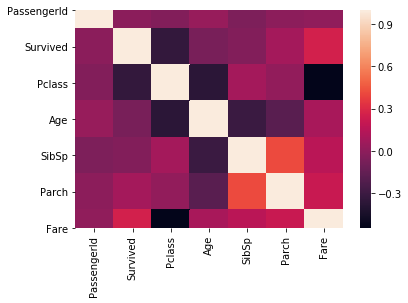

In [11]:
sns.heatmap(train.corr());

In [12]:
train.shape

(891, 12)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


|Variable|	Definition|	Key|
|---      | --: |          |
|**survival**|	Survival|	0 = No, 1 = Yes|
|**pclass**|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|**sex**|	Sex|	|
|**Age**|	Age in years|	|
|**sibsp**|	# of siblings / spouses aboard the Titanic| |	
|**parch**|	# of parents / children aboard the Titanic|	|
|**ticket**|	Ticket number| |	
|**fare**|	Passenger fare| |	
|**cabin**|	Cabin number| |	
|**embarked**|	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [14]:
test['Survived'] = gender_submission['Survived']

In [15]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [16]:
test.shape

(418, 12)

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [18]:
train.drop(['Name','Cabin','Ticket'], axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [19]:
test.drop(['Name','Cabin','Ticket'], axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


In [20]:
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


In [21]:
numeric_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']
categorical_cols = list(set(train.columns.values.tolist()) - set(numeric_cols))
print(categorical_cols)

['Sex', 'Embarked']


In [22]:
d = {'male' : 0, 'female' : 1}
train['Sex'] = train['Sex'].map(d)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [23]:
d = {'male' : 0, 'female' : 1}
test['Sex'] = test['Sex'].map(d)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,0,34.5,0,0,7.8292,Q,0
1,893,3,1,47.0,1,0,7.0000,S,1
2,894,2,0,62.0,0,0,9.6875,Q,0
3,895,3,0,27.0,0,0,8.6625,S,0
4,896,3,1,22.0,1,1,12.2875,S,1


In [24]:
d = {'C' : 0, 'Q' : 1, 'S' : 2}
train['Embarked'] = train['Embarked'].map(d)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


In [25]:
d = {'C' : 0, 'Q' : 1, 'S' : 2}
test['Embarked'] = test['Embarked'].map(d)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,0,34.5,0,0,7.8292,1,0
1,893,3,1,47.0,1,0,7.0000,2,1
2,894,2,0,62.0,0,0,9.6875,1,0
3,895,3,0,27.0,0,0,8.6625,2,0
4,896,3,1,22.0,1,1,12.2875,2,1


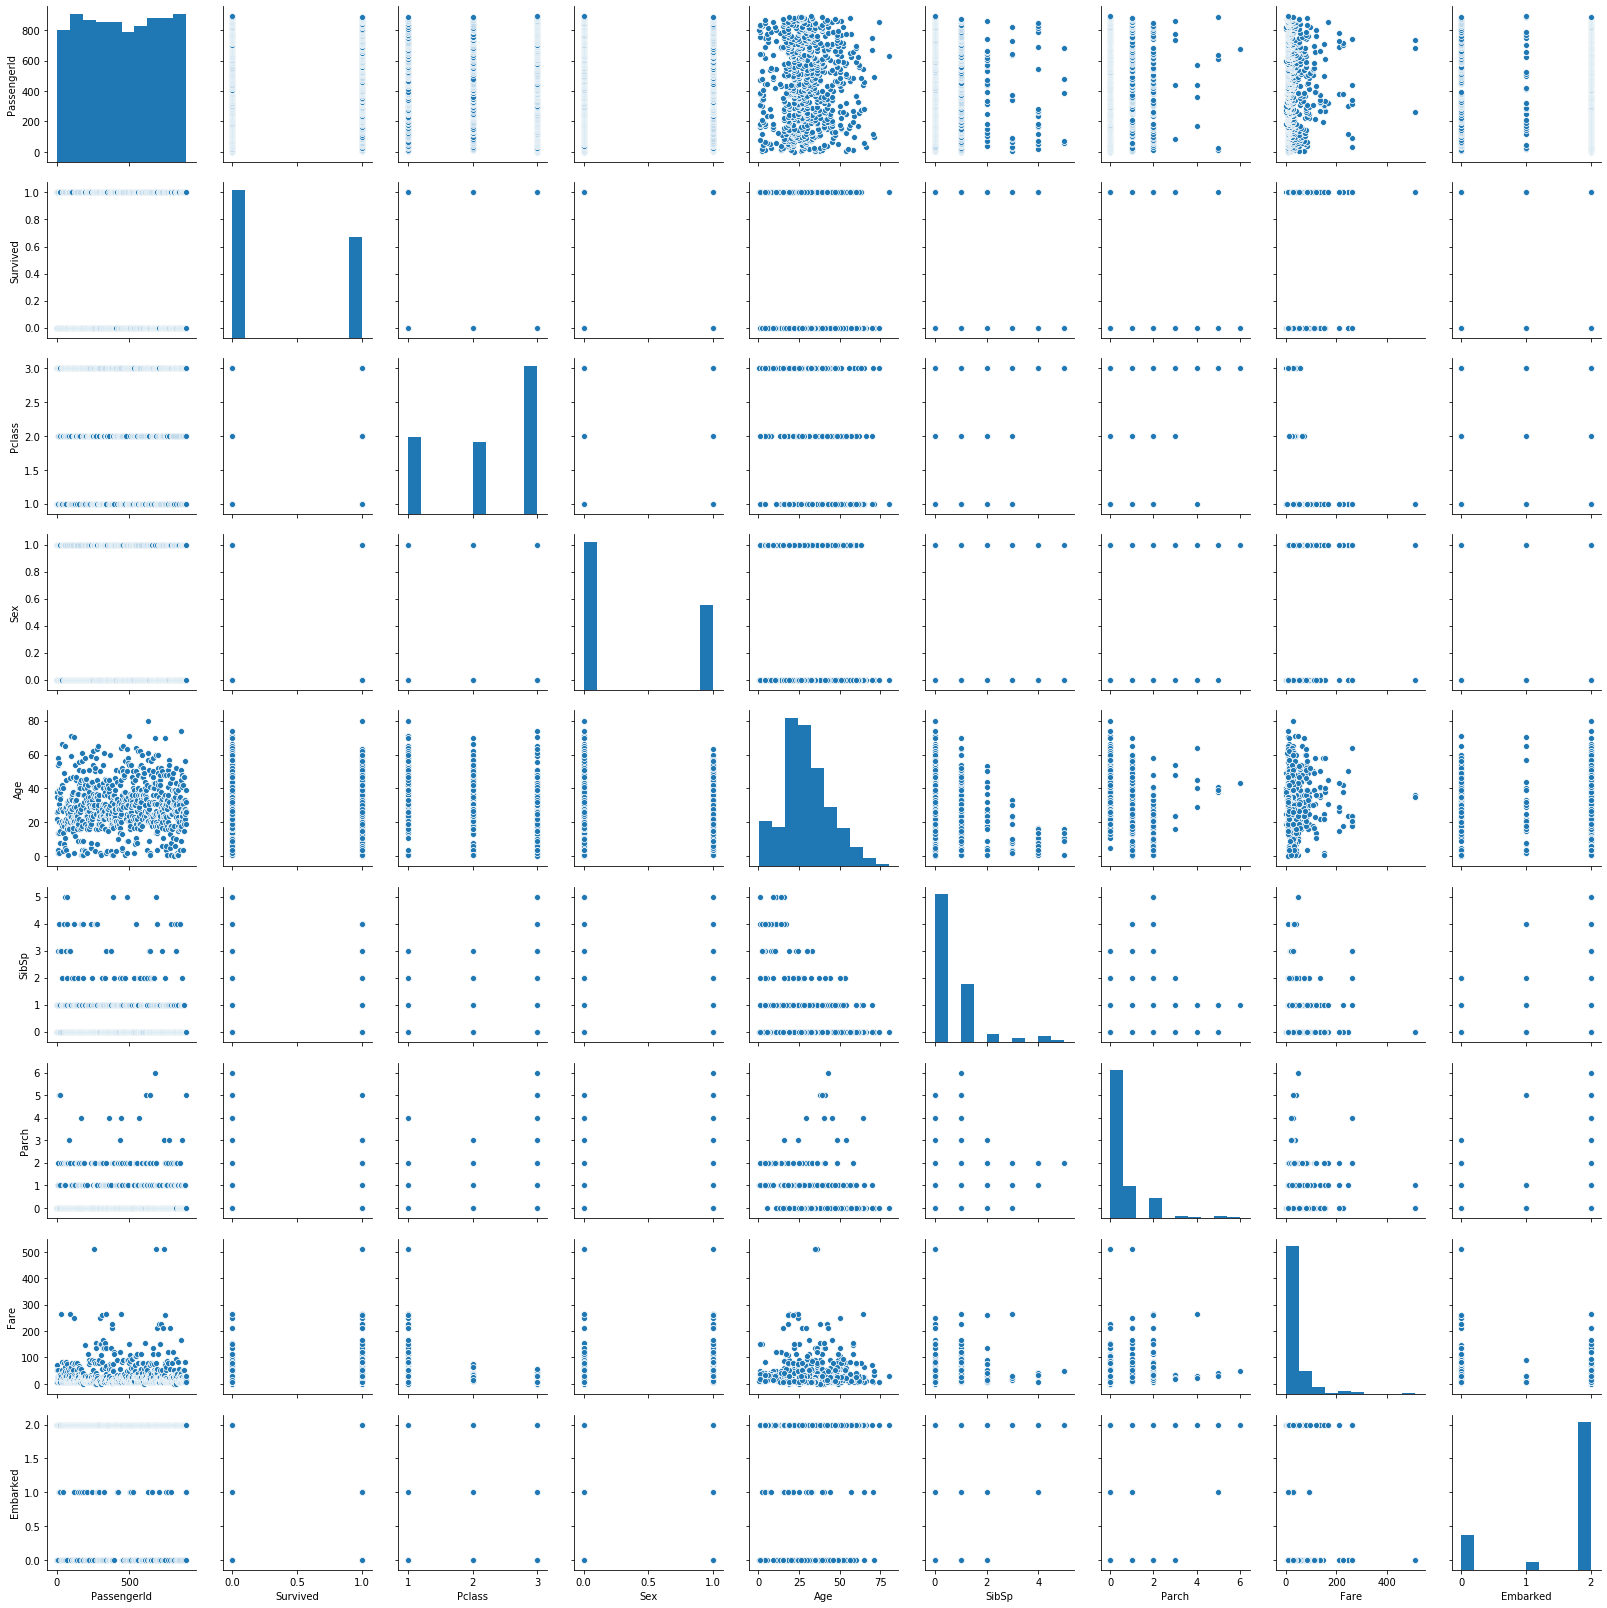

In [26]:
sns.pairplot(train)

In [27]:
train['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

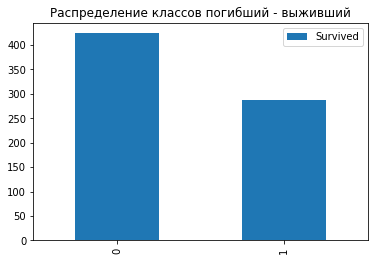

In [28]:
train['Survived'].value_counts().plot(kind='bar', label='Survived')
plt.legend()
plt.title('Распределение классов погибший - выживший');

In [29]:
train_data = train.drop('Survived', axis=1)
train_labels = train['Survived']

In [30]:
test.fillna(0, inplace=True)
test_data = test.drop('Survived', axis=1)
test_labels = test['Survived']

## Модель DecisionTreeClassifier

In [31]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [32]:
predictions_DTC = clf.predict(test_data)

print("Accuracy score is:", score_ac(test_labels, predictions_DTC))
print("Precision score is:", score_pr(test_labels, predictions_DTC))
print("Recall score is:", score_rc(test_labels, predictions_DTC))

Accuracy score is: 0.6555023923444976
Precision score is: 0.5204081632653061
Recall score is: 0.6710526315789473


In [33]:
answer_DTC = pd.DataFrame()
answer_DTC['PassengerId'] = gender_submission['PassengerId']
answer_DTC['Survived'] = [int(i) for i in predictions_DTC]
#answer_DTC.head()
#answer_DTC.shape
answer_DTC.to_csv('predictedTitanicDTC.csv', sep=',', header=True, index=False)

#answer_DTC.head()
#!cat predictedTitanicDTC.csv

In [34]:
DTC_scoring = cross_val_score(clf, train_data, train_labels, scoring = scorer_ac, cv = cv_strategy_KFold)

In [35]:
DTC_scoring

array([0.65734266, 0.55944056, 0.73943662, 0.76056338, 0.8028169 ])

In [36]:
DTC_scoring = cross_val_score(clf, train_data, train_labels, scoring = scorer_pr, cv = cv_strategy_KFold)

In [37]:
DTC_scoring

array([0.46153846, 0.58823529, 0.73214286, 0.75      , 0.72881356])

In [38]:
DTC_scoring = cross_val_score(clf, train_data, train_labels, scoring = scorer_rc, cv = cv_strategy_KFold)

In [39]:
DTC_scoring

array([0.68181818, 0.15151515, 0.65079365, 0.65      , 0.78181818])

In [40]:
#clf.get_params().keys()

In [41]:
#parameters_grid = {
#    'alpha' : [0.5, 1, 1.5, 2],
#    'tol' : [0.00001, 0.0001, 0.001],
#    'max_iter': [500, 1000, 2000],
#}

In [42]:
#grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [43]:
#%%time
#grid_cv.fit(X_train, y_train)

In [44]:
#grid_cv.best_estimator_

In [45]:
#print(grid_cv.best_score_)
#print(grid_cv.best_params_)

In [46]:
#predictions = grid_cv.predict(X_test)
#metrics.mean_absolute_error(y_test, predictions)

In [47]:
from sklearn.preprocessing import StandardScaler

# place your code here
scaler = StandardScaler()
scaler.fit(train_data[['PassengerId', 'Age', 'Fare']], train_labels)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
train_data_scale = scaler.transform(train_data[['PassengerId', 'Age', 'Fare']])
test_data_scale = scaler.transform(test_data[['PassengerId', 'Age', 'Fare']])

In [49]:
train_data_scale

array([[-1.7314791 , -0.52766856, -0.51637992],
       [-1.72761065,  0.57709388,  0.69404605],
       [-1.7237422 , -0.25147795, -0.50362035],
       ...,
       [ 1.69983604, -0.73481151, -0.08633507],
       [ 1.70757294, -0.25147795, -0.08633507],
       [ 1.71144139,  0.16280796, -0.50692839]])

In [50]:
train_data_scaled = train_data
test_data_scaled = test_data

train_data_scaled['PassengerId'] = train_data_scale[:,0]
train_data_scaled['Age'] = train_data_scale[:,1]
train_data_scaled['Fare'] = train_data_scale[:,2]

test_data_scaled['PassengerId'] = test_data_scale[:,0]
test_data_scaled['Age'] = test_data_scale[:,1]
test_data_scaled['Fare'] = test_data_scale[:,2]

In [51]:
train_data_scaled.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.731479,3,0,-0.527669,1,0,-0.516380,2
1,-1.727611,1,1,0.577094,1,0,0.694046,0
2,-1.723742,3,1,-0.251478,0,0,-0.503620,2
3,-1.719874,1,1,0.369951,1,0,0.350326,2
4,-1.716005,3,0,0.369951,0,0,-0.501257,2


In [52]:
test_data_scaled.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.715310,3,0,0.335427,0,0,-0.505431,1
1,1.719178,3,1,1.198523,1,0,-0.521106,2
2,1.723047,2,0,2.234238,0,0,-0.470304,1
3,1.726915,3,0,-0.182430,0,0,-0.489679,2
4,1.730784,3,1,-0.527669,1,1,-0.421156,2


In [53]:
clf.fit(train_data_scaled, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [54]:
predictions_scaled_DTC = clf.predict(test_data_scaled)
metrics.accuracy_score(test_labels, predictions_scaled_DTC)

0.6555023923444976

## Random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [57]:
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 0)

In [58]:
rf_classifier.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [59]:
predictions_RF = rf_classifier.predict(test_data)

print("Accuracy score is:", score_ac(test_labels, predictions_RF))
print("Precision score is:", score_pr(test_labels, predictions_RF))
print("Recall score is:", score_rc(test_labels, predictions_RF))

Accuracy score is: 0.7105263157894737
Precision score is: 0.581151832460733
Recall score is: 0.7302631578947368


In [60]:
answer_RFC = pd.DataFrame()
answer_RFC['PassengerId'] = gender_submission['PassengerId']
answer_RFC['Survived'] = [int(i) for i in predictions_RF]
#answer_RFC.head()
#answer_RFC.shape
answer_RFC.to_csv('predictedTitanicRFC.csv', sep=',', header=True, index=False)

#answer_RFC.head()
#!cat predictedTitanicRFC.csv

In [61]:
n_trees = [1] + [i for i in range(10, 105, 5)] 

In [62]:
%%time
scoring = []
for n_tree in n_trees:
    estimator = RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=0)
    score = cross_val_score(estimator, train_data, train_labels, scoring = 'accuracy', cv = 3)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

CPU times: user 5.33 s, sys: 49.1 ms, total: 5.38 s
Wall time: 5.39 s


In [63]:
scoring

matrix([[0.68907563, 0.73839662, 0.80590717],
        [0.74789916, 0.7721519 , 0.80590717],
        [0.77310924, 0.78481013, 0.80168776],
        [0.76890756, 0.78059072, 0.82278481],
        [0.77731092, 0.77637131, 0.82278481],
        [0.77731092, 0.78902954, 0.83122363],
        [0.76470588, 0.78481013, 0.8185654 ],
        [0.7394958 , 0.79324895, 0.82278481],
        [0.7394958 , 0.78481013, 0.82278481],
        [0.7394958 , 0.78059072, 0.82700422],
        [0.73109244, 0.78902954, 0.81434599],
        [0.72268908, 0.78059072, 0.81012658],
        [0.72689076, 0.78902954, 0.81434599],
        [0.72268908, 0.78902954, 0.8185654 ],
        [0.72268908, 0.77637131, 0.8185654 ],
        [0.71428571, 0.76371308, 0.8185654 ],
        [0.70588235, 0.76793249, 0.82278481],
        [0.71428571, 0.78059072, 0.82700422],
        [0.71428571, 0.77637131, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422]])

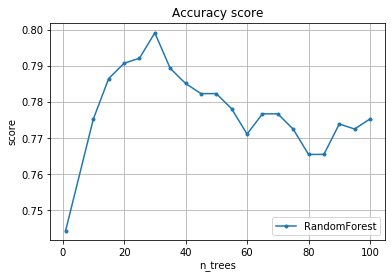

In [64]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [65]:
rf_classifier = RandomForestClassifier(n_estimators = 30, min_samples_split=5, random_state=0)
rf_classifier.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [66]:
predictions_RFC = rf_classifier.predict(test_data)

print("Accuracy score is:", score_ac(test_labels, predictions_RFC))
print("Precision score is:", score_pr(test_labels, predictions_RFC))
print("Recall score is:", score_rc(test_labels, predictions_RFC))

Accuracy score is: 0.6507177033492823
Precision score is: 0.515
Recall score is: 0.6776315789473685


In [67]:
answer_RFC = pd.DataFrame()
answer_RFC['PassengerId'] = gender_submission['PassengerId']
answer_RFC['Survived'] = [int(i) for i in predictions_RFC]
#answer_RFC.head()
#answer_RFC.shape
answer_RFC.to_csv('predictedTitanicRFC.csv', sep=',', header=True, index=False)

#answer_RFC.head()
#!cat predictedTitanicRFC.csv

## XGBoost

In [68]:
import xgboost as xgb

In [69]:
%%time
xgb_scoring = []
for n_tree in n_trees:
    estimator_XGB = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3, random_state = 0)
    score = cross_val_score(estimator, train_data, train_labels, scoring = 'accuracy', cv = 3)    
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

CPU times: user 9.66 s, sys: 71.5 ms, total: 9.73 s
Wall time: 9.73 s


In [70]:
xgb_scoring

matrix([[0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422],
        [0.71848739, 0.78059072, 0.82700422]])

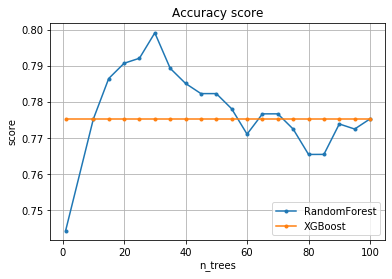

In [71]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [72]:
estimator_XGB = xgb.XGBClassifier(learning_rate=0.05, max_depth=5, n_estimators=100, min_child_weight=3, random_state = 0)

In [73]:
estimator_XGB.fit(train_data, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [74]:
predictions_XGB = estimator_XGB.predict(test_data)

print("Accuracy score is:", score_ac(test_labels, predictions_XGB))
print("Precision score is:", score_pr(test_labels, predictions_XGB))
print("Recall score is:", score_rc(test_labels, predictions_XGB))

Accuracy score is: 0.7033492822966507
Precision score is: 0.5686274509803921
Recall score is: 0.7631578947368421


In [75]:
answer_XGB = pd.DataFrame()
answer_XGB['PassengerId'] = gender_submission['PassengerId']
answer_XGB['Survived'] = [int(i) for i in predictions_XGB]
#answer_XGB.head()
#answer_XGB.shape
answer_XGB.to_csv('predictedTitanicXGB.csv', sep=',', header=True, index=False)

#answer_XGB.head()
#!cat predictedTitanicXGB.csv